<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/205_discr_rv_distr.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(discr_distr_notebook)=
# Distribuzioni di v.c. discrete

In questo capitolo, esploreremo le principali distribuzioni di probabilità relative alle variabili casuali discrete. Ad esempio, considereremo un esperimento casuale che può avere solo due possibili esiti (successo o insuccesso), e tale situazione potrà essere modellata con una variabile casuale di Bernoulli. Una sequenza di tali prove di Bernoulli costituisce un processo Bernoulliano. Inoltre, il numero di successi dopo $n$ prove di Bernoulli segue una distribuzione binomiale.

La distribuzione binomiale deriva da un insieme di prove di Bernoulli solo se il numero totale $n$ è fissato in modo predeterminato. Se il numero di prove stesse è una variabile casuale, allora il numero di successi nella corrispondente sequenza di prove bernoulliane segue la distribuzione di Poisson.

Concluderemo questo capitolo con l'analisi della distribuzione discreta uniforme, in cui ogni valore all'interno di un intervallo finito ha la stessa probabilità di occorrenza.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
import arviz as az

In [30]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Una prova Bernoulliana

Se un esperimento casuale ha solo due esiti possibili, allora le repliche indipendenti di questo esperimento sono chiamate "prove Bernoulliane" (il lancio di una moneta è il tipico esempio).

```{admonition} Definizione
Viene detta variabile di Bernoulli una variabile casuale discreta $Y = \{0, 1\}$ con la seguente distribuzione di probabilità:

$$
P(Y \mid \theta) =
  \begin{cases}
    \theta     & \text{se $Y = 1$}, \\
    1 - \theta & \text{se $Y = 0$},
  \end{cases}
$$

con $0 \leq \theta \leq 1$. Convenzionalmente l'evento $\{Y = 1\}$ con probabilità $\theta$ viene chiamato "successo" mentre l'evento $\{Y = 0\}$ con probabilità $1-\theta$ viene chiamato "insuccesso".
```

Applicando l'operatore di valore atteso e di varianza, otteniamo

$$
\begin{align}
\mathbb{E}(Y) &= 0 \cdot P(Y=0) + 1 \cdot P(Y=1) = \theta, \\
\mathbb{V}(Y) &= (0 - \theta)^2 \cdot P(Y=0) + (1 - \theta)^2 \cdot P(Y=1) = \theta(1-\theta).
\end{align}
$$ (eq-ev-var-bern)

Scriviamo $Y \sim Bernoulli(\theta)$ per indicare che la variabile casuale $Y$ ha una distribuzione Bernoulliana di parametro $\theta$.

Nel caso del lancio di una moneta equilibrata la variabile casuale di Bernoulli assume i valori $0$ e $1$. La distribuzione di massa di probabilità è pari a $\frac{1}{2}$ in corrispondenza di entrambi i valori. La funzione di distribuzione vale $\frac{1}{2}$ per $Y = 0$ e $1$ per $Y = 1$.

## Una sequenza di prove Bernoulliane

La distribuzione binomiale rappresenta la distribuzione di probabilità discreta degli eventi in cui una variabile casuale di Bernoulli viene ripetuta per un numero fisso di volte $n$, ciascuna con la stessa probabilità di successo $\theta$. La distribuzione binomiale è quindi caratterizzata dall'elenco di tutti i possibili numeri di successi $Y = {0, 1, 2, \dots, n}$ che possono essere osservati in queste $n$ prove indipendenti, a ciascuno dei quali è associata una relativa probabilità.

La distribuzione binomiale è utilizzata per modellare diversi esperimenti, come ad esempio il risultato di una serie di lanci di una stessa moneta o il numero di successi in una serie di estrazioni da un'urna con reintroduzione. È importante notare che la distribuzione binomiale è in realtà una famiglia di distribuzioni, in quanto le probabilità variano al variare dei parametri $\theta$ e $n$.

```{admonition} Definizione
La probabilità di ottenere $y$ successi e $n-y$ insuccessi in $n$ prove Bernoulliane è data dalla distribuzione binomiale:

$$
\begin{align}
P(Y=y) &= \binom{n}{y} \theta^{y} (1-\theta)^{n-y} \notag \\
&= \frac{n!}{y!(n-y)!} \theta^{y} (1-\theta)^{n-y}, 
\end{align}
$$ (eq-binomialdistribution)

dove $n$ = numero di prove Bernoulliane, $\theta$ = probabilità di successo in ciascuna prova e $y$ = numero di successi.
```

L'eq. {eq}`eq-binomialdistribution` può essere derivata nel modo seguente. Indichiamo con $S$ il successo e con $I$ l'insuccesso di ciascuna prova. Una sequenza di $n$ prove Bernoulliane darà come esito una sequenza di $n$ elementi $S$ e $I$. Ad esempio, una sequenza che contiene $y$ successi è la seguente:

$$
\overbrace{SS\dots S}^\text{$y$ volte} \overbrace{II\dots I}^\text{$n-y$ volte}
$$

Essendo $\theta$ la probabilità di $S$ e $1-\theta$ la probabilità di $I$, la probabilità di ottenere la specifica sequenza riportata sopra è

$$
\begin{equation}
\overbrace{\theta \theta\dots \theta}^\text{$y$ volte} \overbrace{(1-\theta)(1-\theta)\dots (1-\theta)}^\text{$n-y$ volte} = \theta^y \cdot (1-\theta)^{n-y}.
\end{equation}
$$ (eq-demo-bino-kernel)

Non siamo però interessati alla probabilità di una *specifica* sequenza di $S$ e $I$ ma, bensì, alla probabilità di osservare una *qualsiasi* sequenza di $y$ successi in $n$ prove. In altre parole, vogliamo la probabilità dell'unione di tutti gli eventi corrispondenti a $y$ successi in $n$ prove.

È immediato notare che una qualsiasi altra sequenza contenente esattamente $y$ successi avrà sempre come probabilità $\theta^y \cdot (1-\theta)^{n-y}$: il prodotto infatti resta costante anche se cambia l'ordine dei fattori.[^022_discr_rv_distr-1] Per trovare il risultato cercato dobbiamo moltiplicare l'eq. {eq}`eq-demo-bino-kernel` per il numero di sequenze possibili di $y$ successi in $n$ prove.

Il numero di sequenze che contengono esattamente $y$ successi in $n$ prove è fornito dal coefficiente binomiale

$$
\binom{n}{y} = \frac{n!}{y!(n-y)!},
$$ (eq-binomial-coefficient)

dove il simbolo $n!$ si legge $n$ fattoriale ed è uguale al prodotto di $n$ numeri interi decrescenti a partire da $n$. Per definizione $0! = 1$.

Essendo la probabilità dell'unione di $K$ elementi incompatibili uguale alla somma delle loro rispettive probabilità, e dato che le sequenze di $y$ successi in $n$ prove hanno tutte la stessa probabilità, per trovare la formula della distributione binomiale {eq}`eq-binomialdistribution` è sufficiente moltiplicare l'eq. {eq}`eq-demo-bino-kernel` per la {eq}`eq-binomial-coefficient`.

[^022_discr_rv_distr-1]: Viene detta *scambiabilità* la proprietà per cui l'ordine con cui compiamo le osservazioni è irrilevante per l'assegnazione delle probabilità.

Supponiamo di avere osservato 2 successi in 4 prove bernoulliane con probabilità di successo $\theta$ = 0.2. Qual è la probabilità di ottenere questo risultato?

La risposta è fornita dall'eq. {eq}`eq-binomialdistribution`:

$$
\begin{aligned}
P(Y=2) &= \frac{4!}{2!(4-2)!} 0.2^{2} (1-0.2)^{4-2} \notag  \\
 &= \frac{4 \cdot 3 \cdot 2 \cdot 1}{(2 \cdot 1)(2 \cdot 1)}
0.2^{2} 0.8^{2} = 0.1536. \notag
\end{aligned}
$$

Svolgiamo lo stesso calcolo usando Python.

In [5]:
n = 4
theta = 0.2
y = 2

math.comb(n, y) * theta**y * (1 - theta) ** (n - y)

0.15360000000000007

Lo stesso risultato si può trovare usando una funzione dedicata in Python. La libreria SciPy contiene funzioni analitiche per una vasta gamma di distribuzioni e funzioni di massa di probabilità; le potete trovare [qui](https://docs.scipy.org/doc/scipy/reference/stats.html). Per la [binomiale](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html), si usa `scipy.stats.binom`. 

Per trovare i valori di massa di probabilità binomiali usiamo `stats.binom.pmf(y, n, p)`. 

In [6]:
stats.binom.pmf(y, n, theta)

0.1535999999999999

Ripetendo i calcoli per i valori $y = 0, \dots, 4$ troviamo la distribuzione binomiale di parametri $n = 4$ e $\theta = 0.2$:

|  y  | P(Y = y) |
|:---:|:--------:|
|  0  |  0.4096  |
|  1  |  0.4096  |
|  2  |  0.1536  |
|  3  |  0.0256  |
|  4  |  0.0016  |
| sum |   1.0    |

Lo stesso risultato si trova usando `stats.binom.pmf`. Per fare questo definisco `y` come un array NumPy.

In [7]:
y = np.arange(0, n+1)
print(*y)

0 1 2 3 4


Posso ora trovare le probabilità associate a ciascuno dei possibili valori che la variabile casuale $Y$ può assumere.

In [8]:
stats.binom.pmf(y, n, theta)

array([0.4096, 0.4096, 0.1536, 0.0256, 0.0016])

Rappresentiamo graficamente la distribuzione di massa di probabilità.

(0.0, 0.4300800000000001)

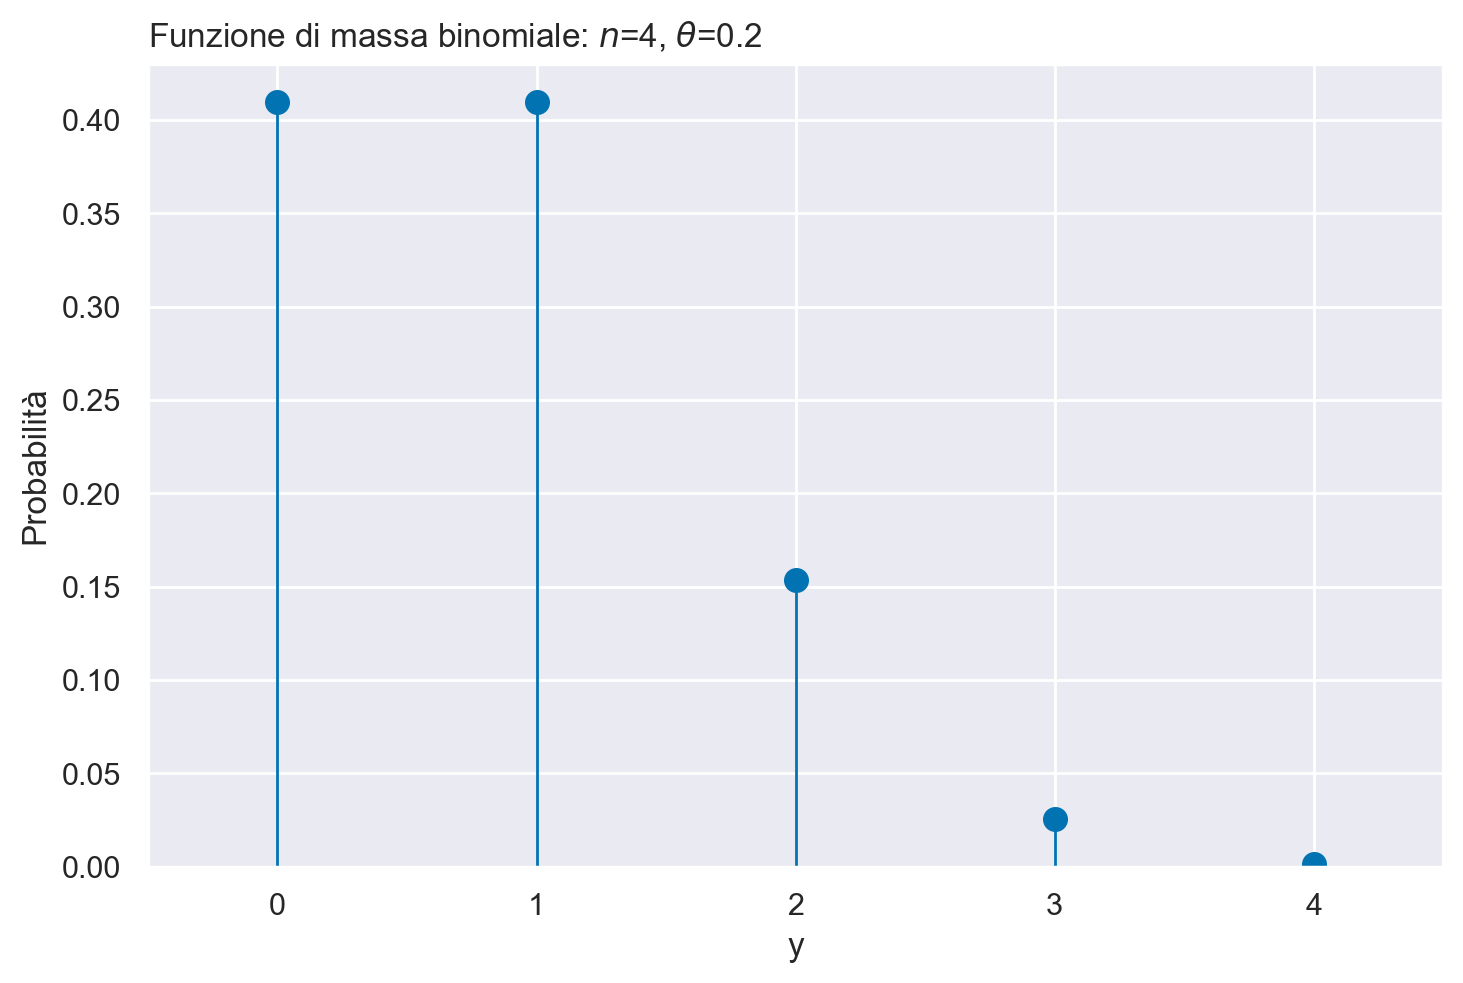

In [9]:
fig, ax = plt.subplots()
ax.plot(y, stats.binom.pmf(y, n, theta), "bo", ms=8)
ax.vlines(y, 0, stats.binom.pmf(y, n, theta), colors="b", linestyles="-", lw=1)
ax.set_title(f"Funzione di massa binomiale: $n$={n}, $\\theta$={theta}", loc="left")
ax.set_xlabel("y")
ax.set_ylabel("Probabilità")
ax.set_xlim(0-0.5, 4+0.5)
ax.set_ylim(0, None)

Esistono due modi per usare `scipy` per la binomiale. È possibile prima dichiarare un oggetto che corrisponde ad una variabile casuale, ad esempio `rv = binom(n, theta)`, e poi chiamare `rv.pmf(y)`. Oppure si può usare la chiamata `binom.pmf(y, n, theta)`. Nel caso presente stiamo usando il secondo metodo.

Per fare un altro esempio, mostriamo qui la distribuzione di probabilità di alcune distribuzioni binomiali, per due valori di $n$ e $\theta$, è fornita nella figura seguente.

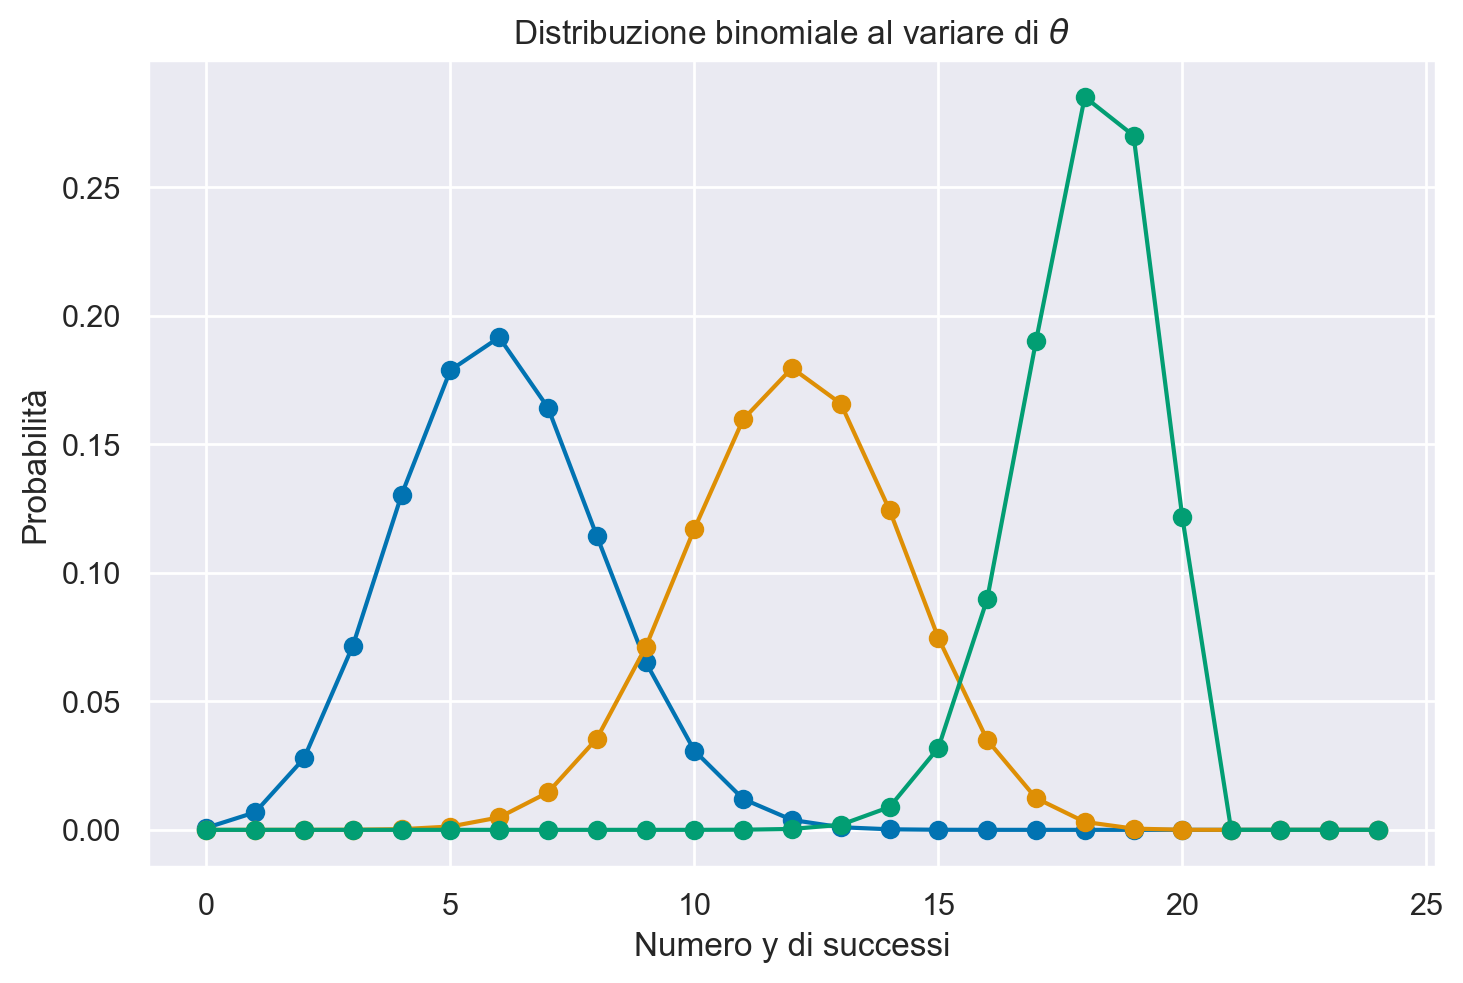

In [10]:
for theta in range(3, 10, 3):
    y = np.arange(0, 25)
    binom = stats.binom.pmf(y, 20, 0.1*theta)
    plt.plot(y, binom, '-o', label="theta = {:f}".format(0.1*theta))
    plt.xlabel('Numero y di successi')
    plt.ylabel('Probabilità')
    plt.title("Distribuzione binomiale al variare di $\\theta$")

Consideriamo un altro esempio. Lanciando $5$ volte una moneta onesta, qual è la probabilità che esca testa almeno tre volte?

In [11]:
stats.binom.pmf(3, n=5, p=0.5) + stats.binom.pmf(4, n=5, p=0.5) +  stats.binom.pmf(5, n=5, p=0.5)

0.49999999999999983

In [12]:
np.sum([stats.binom.pmf(k, n=5, p=0.5) for k in range(3, 6)])

0.49999999999999983

Più facilmente, si trova la risposta usando la funzione di ripartizione `binom.cdf`.

In [13]:
1 - stats.binom.cdf(2, n=5, p=0.5)

0.5

Rappresentiamo graficamente la funzione di distribuzione per una Binomiale di ordine $n$ = 5 e $\theta$ = 0.5.

Text(0, 0.5, 'Probabilità')

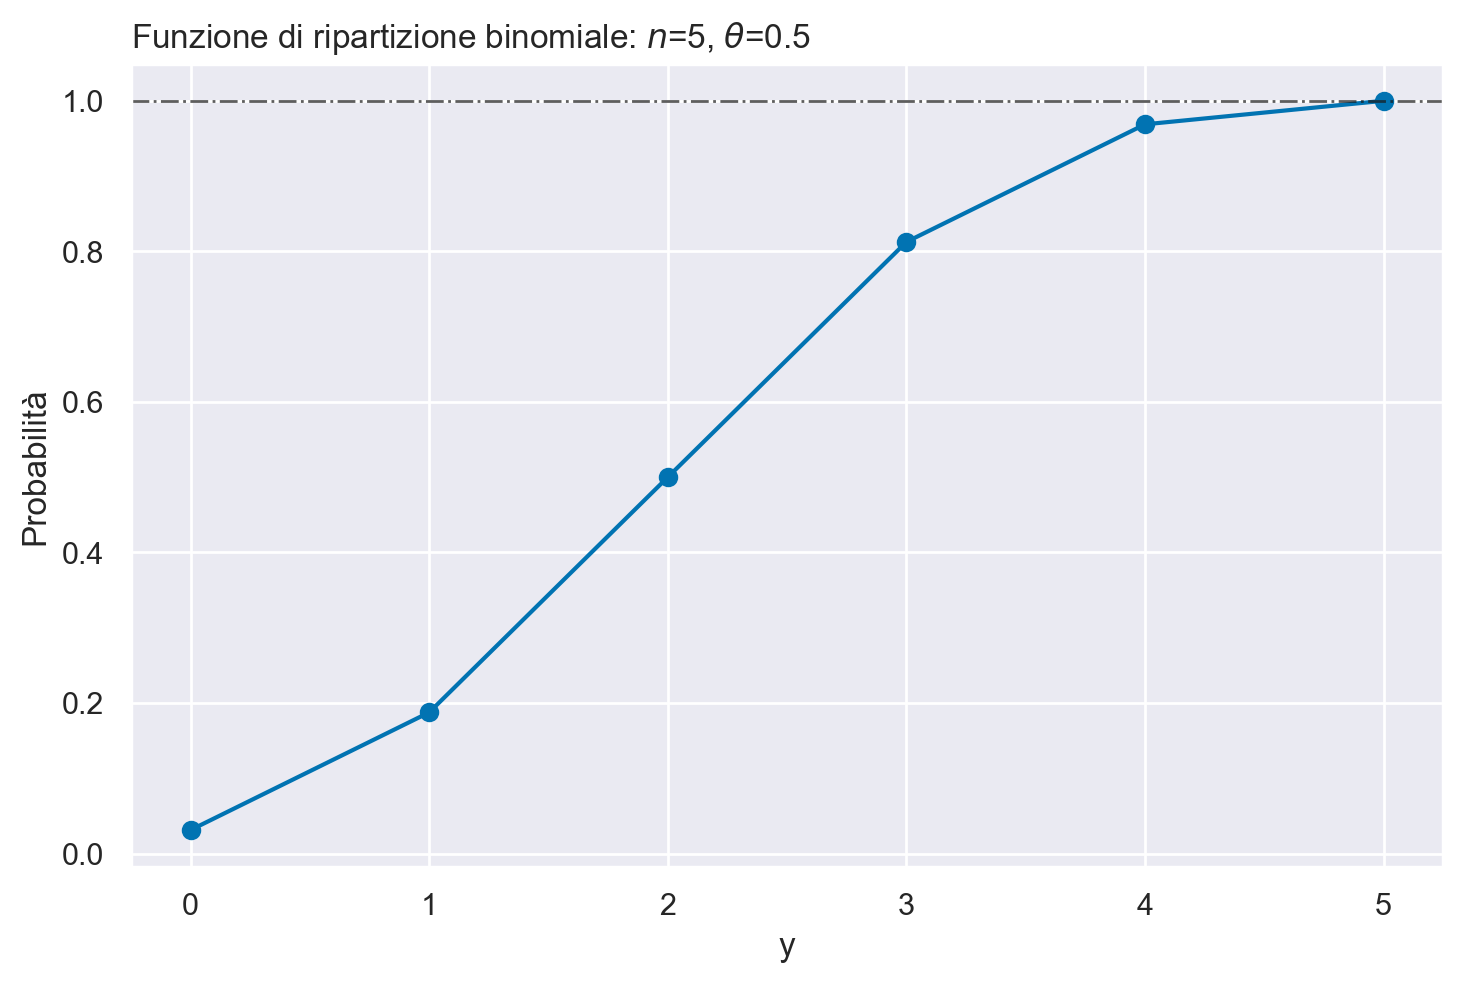

In [14]:
n = 5
theta = 0.5
y = np.arange(0, n+1)

_, ax = plt.subplots()
ax.plot(y, stats.binom.cdf(y, n=n, p=theta))
ax.scatter(y, stats.binom.cdf(y, n=n, p=theta))
ax.axhline(1, color="k", alpha=0.7, linestyle="-.", lw=1)
ax.set_title(f"Funzione di ripartizione binomiale: $n$={5}, $\\theta$={theta}", loc="left")
ax.set_xlabel("y")
ax.set_ylabel("Probabilità")

Resta da capire come generare una sequenza casuale di valori da una distribuzione Binomiale. Per fare questo, prima creiamo una variabile casuale Binomiale "frozen". Una variabile casuale *frozen* è un'istanza di una distribuzione di probabilità che è stata fissata in modo che i suoi parametri non possano essere modificati. Quando si crea una variabile casuale *frozen*, si specificano i valori dei parametri della distribuzione di probabilità (nel nostro caso, il numero di prove e la probabilità di successo). Dopo che la variabile casuale è stata creata, i suoi parametri non possono essere modificati. Invece, è possibile generare campioni dalla distribuzione di probabilità corrispondente usando il metodo `rvs()` della variabile casuale *frozen*. Per esempio, definiamo una variabile casuale Binomiale *frozen* di parametri $n$ = 5 e $p$ = 0.5.

In [15]:
n = 5
p = 0.5
rv = stats.binom(n, p)

Generiamo poi 30 realizzazioni della v.c. `rv`: 

In [16]:
x = rv.rvs(30)
print(*x)

2 4 3 3 1 1 1 4 3 3 0 5 4 2 1 1 2 3 2 2 3 1 2 2 2 3 2 3 3 1


Lo stesso risultato si può anche ottenere mediante la funzione `random.binomial()` di NumPy.

In [17]:
x = np.random.binomial(p=.5, n=5, size=30)
print(*x)

3 1 1 4 4 3 2 1 3 2 1 2 1 4 2 3 2 3 3 1 5 3 4 4 3 4 1 2 1 2


### Valore atteso e deviazione standard

La media (numero atteso di successi in $n$ prove) e la deviazione standard di una distribuzione binomiale si trovano nel modo seguente:

$$
\begin{align}
\mu    &= n\theta,  \notag \\
\sigma &= \sqrt{n\theta(1-\theta)}.
\end{align}
$$ (eq-mean-var-binomial)

```{admonition} Dimostrazione
Essendo $Y$ la somma di $n$ prove Bernoulliane indipendenti $Y_i$, è facile vedere che

$$
\begin{align}
\mathbb{E}(Y) &= \mathbb{E}\left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{E}(Y_i) = n\theta, \\
\mathbb{V}(Y) &= \mathbb{V} \left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{V}(Y_i) = n \theta (1-\theta).
\end{align}
$$
```

Si trovino il valore atteso e la varianza del lancio di quattro monete con probabilità di successo pari a $\theta = 0.2$.

Il valore atteso è $\mu = n \theta = 4 \cdot 0.2 = 0.8.$ La varianza è $n \theta (1-\theta) = 4 \cdot 0.2 \cdot (1 - 0.2) = 0.64$.

Ciò significa che, se l'esperimento casuale venisse ripetuto infinite volte, l'esito testa verrebbe osservato un numero medio di volte pari a 0.8, con una varianza di 0.64.  

Verifichiamo questi risultati con una simulazione.

In [18]:
n = 4
p = 0.2
rv = stats.binom(n, p)

x = rv.rvs(100000)

In [19]:
np.mean(x)

0.79815

In [20]:
np.var(x, ddof=0)

0.6351865775

## Distribuzione discreta uniforme

Abbiamo già introdotto la distribuzione uniforme in precedenza. Ricordiamo che una distribuzione discreta uniforme è una distribuzione di probabilità discreta che è uniforme su un insieme, ovvero che attribuisce ad ogni elemento dell'insieme discreto e finito $S$ su cui è definita la stessa probabilità $p$ di verificarsi.

Si consideri una variabile casuale discreta $X$ con supporto $1, 2, \dots, N$. Un esperimento casuale in cui si verifica questa distribuzione è la scelta casuale di un intero compreso tra 1 e $N$ inclusi. Sia $X$ il numero scelto. La condizione di normalizzazione implica che

$$
\sum_{i=1}^N P(X_i) = \sum_{i=1}^N P = Np = 1.
$$

Allora

$$
P(X = x) = \frac{1}{N}, 
$$

dove $N$ è il numero dei possibili eventi.

Il valore atteso di $X$ è

$$
\mathbb{E}(X) = \sum_{x=1}^N x f_X(x) = \sum_{x=1}^N x \frac{1}{N} = \frac{1}{N} (1 + 2 + \dots + N) = \frac{N+1}{2},
$$

dove abbiamo utilizzato l'identità $1+2+···+N = N(N+1)/2$.

Per trovare la varianza, prima calcoliamo

$$
\mathbb{E}(X^2) = \frac{1}{N} \sum_{x=1}^N x^2,
$$ 

e poi troviamo

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - \left[\mathbb{E}(X)\right]^2.
$$

## Distribuzione di Poisson

Sia la variabile casuale discreta $Y$ il numero di eventi indipendenti che si verificano in una specifica unità di tempo o spazio, dove $\lambda$ rappresenta il tasso con cui tali eventi si verificano. Di conseguenza, la relazione di dipendenza di $Y$ dal parametro $\lambda$ può essere descritta attraverso l'utilizzo della distribuzione di Poisson.

La funzione di massa di probabilità del modello di Poisson è definita dalla seguente formula:

$$
f(y \mid \lambda) = \frac{{\lambda^y \cdot e^{-\lambda}}}{{y!}} \quad \text{per} \quad y \in \{0, 1, 2, \ldots\},
$$

dove:

- $f(y \mid \lambda)$ rappresenta la probabilità che esattamente $y$ eventi si verifichino nell'intervallo di tempo o spazio specificato.
- Il parametro $\lambda$ rappresenta il tasso di occorrenza degli eventi nella durata dell'intervallo specificato.
- $y$ rappresenta il numero di eventi, il quale può assumere solo valori interi non negativi (0, 1, 2, 3, ...).
  
La distribuzione di Poisson è caratterizzata dalla proprietà che la varianza è uguale al tasso medio $\lambda$, il che significa che la varianza aumenta linearmente con il tasso di occorrenza degli eventi.

Quale esempio, presentiamo qui sotto un grafico con la distribuzione di Poisson di parametro $\lambda$ = 2.

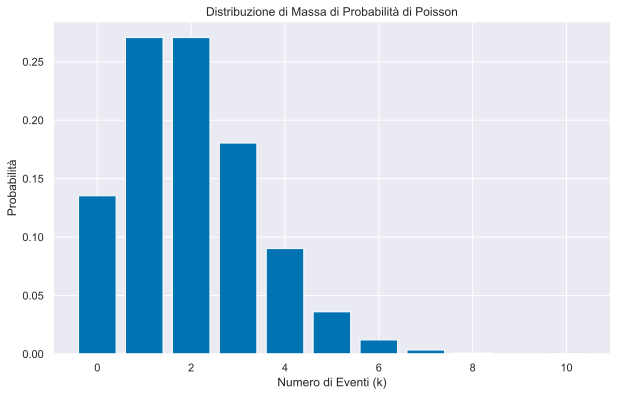

In [12]:
# Tasso medio di occorrenza di eventi
lambda_value = 2

# Creazione della distribuzione di Poisson con il tasso medio specificato
poisson_dist = stats.poisson(mu=lambda_value)

# Calcolo della probabilità di avere un certo numero di eventi
k_values = range(0, 11)  # Consideriamo valori da 0 a 10

# Calcolo delle probabilità corrispondenti
probabilities = poisson_dist.pmf(k_values)

# Plot della distribuzione di massa di probabilità
plt.bar(k_values, probabilities)
plt.xlabel('Numero di Eventi (k)')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Massa di Probabilità di Poisson')
plt.show()

La probabilità di un singolo valore $y$ si ottiene utilizzando la funzione `pmf`, in cui l'argomento `k` rappresenta il numero di eventi ($y$) e `mu` è uguale a $\lambda$. Ad esempio, la probabilità di osservare esattamente un evento ($y = 1$) dato un tasso di occorrenza $\lambda$ = 2, è data da:

In [31]:
stats.poisson.pmf(k=1, mu=2)

0.2706705664732254

La funzione `ppf`, che richiede come argomenti la probabilità e $\lambda$, restituisce il quantile della distribuzione di Poisson. Ad esempio, nel caso precedente abbiamo:

In [32]:
stats.poisson.ppf(0.2706705664732254, mu=2)

1.0

La funzione di ripartizione si ottiene utilizzando `cdf`. Per esempio:

In [42]:
stats.poisson.cdf(2, mu=2)

0.6766764161830634

Verifichiamo:

In [43]:
stats.poisson.pmf(0, mu=2) + stats.poisson.pmf(1, mu=2) + stats.poisson.pmf(2, mu=2)

0.6766764161830635

La generazione di numeri casuali dalla distribuzione di Poisson può essere ottenuta utilizzando `rng`. Ad esempio:

In [33]:
rng.poisson(2, 10)

array([4, 3, 3, 2, 1, 5, 2, 0, 1, 3])

Verifichiamo:

In [40]:
rng.poisson(2, 10000).mean()

1.9979

## Distribuzione beta-binomiale

La distribuzione beta-binomiale di parametri $N$, $\alpha$ e $\beta$ è una distribuzione discreta con una funzione di massa di probabilità uguale a

$$
BetaBinomial(y \mid N, \alpha, \beta) = \binom{N}{y} \frac{B(y + \alpha, N-y+\beta)}{B(\alpha, \beta)},
$$ (eq-beta-binom-formula)

dove la funzione beta è $B(u, v) = \frac{\Gamma(u)\Gamma(v)}{\Gamma(u+v)}$.

## Commenti e considerazioni finali

La distribuzione binomiale è una distribuzione di probabilità discreta che descrive il numero di successi in un processo di Bernoulli, ovvero la variabile aleatoria $Y = Y_1 + \dots + Y_n$ che somma $n$ variabili casuali indipendenti di uguale distribuzione di Bernoulli $\mathcal{B}(\theta)$, ognuna delle quali può fornire due soli risultati: il successo con probabilità $\theta$ e l'insuccesso con probabilità $1 - \theta$.

La distribuzione binomiale è molto importante per le sue molte applicazioni. Nelle presenti dispense dedicate all'analisi bayesiana, è importante perché costituisce il fondamento del caso più semplice dell'*aggiornamento bayesiano*, ovvero il caso Beta-Binomiale. Il modello Beta-Binomiale fornisce un esempio paradigmatico dell'approccio bayesiano all'inferenza e sarà trattato in maniera analitica nei capitoli successivi. È dunque importante che le proprietà della distribuzione binomiale risultino ben chiare. 

Un approfondimento sulla generazione di valori casuali da distribuzioni di massa di probabilità è fornito nell'appendice {ref}`rng-appendix`.

## Watermark

In [ ]:
%watermark -n -u -v -iv -w -p pytensor